In [80]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import numpy as np
df=pd.read_csv('spotify_artist_data.csv')
df.rename(columns={"Artist Name": 'Artist_Name', "Lead Streams": 'Lead_Streams'}, inplace=True)
df['Lead_Streams'] = df['Lead_Streams'].str.replace(',', '')
df['Feats'] = df['Feats'].str.replace(',', '') 
df['Tracks'] = df['Tracks'].str.replace(',', '') 
df['Lead_Streams'] = pd.to_numeric(df['Lead_Streams'])
df['Feats'] = pd.to_numeric(df['Feats'])
df['Tracks'] = pd.to_numeric(df['Tracks'])
df.drop(['Unnamed: 0', 'One Billion', "100 Million", 'Last Updated'], axis=1, inplace=True)
df.set_index("Artist_Name", inplace=True, drop=True)
df

,Lead_Streams,Feats,Tracks
Artist_Name,,,
Drake,50162292808,19246513666,262
Bad Bunny,44369032140,5391990975,163
Ed Sheeran,38153682361,2791278201,240
The Weeknd,34767779741,4288903657,186
Taylor Swift,32596728109,424053296,323
...,...,...,...
Gotye,1424591618,10576378,46
NIKI,1422920850,231405433,55
Duke Dumont,1422096182,24622115,121


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Drake to Beck
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Lead_Streams  1000 non-null   int64
 1   Feats         1000 non-null   int64
 2   Tracks        1000 non-null   int64
dtypes: int64(3)
memory usage: 31.2+ KB


In [82]:
artist_name_map = df.to_dict(orient='index')

C:\Users\jkleh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jkleh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jkleh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

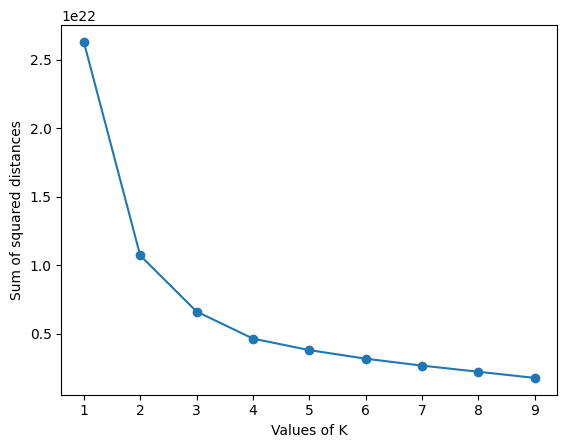

In [84]:
elbow_scores = dict()
range_of_k = range(1,10) 
for k in range_of_k :
 untrained_model = KMeans(n_clusters=k)
 trained_model=untrained_model.fit(df)
 elbow_scores[k]=trained_model.inertia_
 
plt.plot(elbow_scores.keys(),elbow_scores.values())
plt.scatter(elbow_scores.keys(),elbow_scores.values())
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances") 
plt.show()




In [85]:
from sklearn.cluster import KMeans
k = 2
cluster_model = KMeans(n_clusters=k)
cluster_model.fit(df)
KMeans()
cluster_labels = cluster_model.predict(df)
artist_cluster_df = pd.DataFrame(cluster_labels, index=df.index, columns=["cluster"])
artist_cluster_df["cluster"].value_counts()
for cluster,actors in artist_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", actors.shape[0])
    
    for a_id in actors.sample(5).index:
        print("\t", a_id, artist_name_map[a_id])

Cluster: 0 Size: 941
	 Dermot Kennedy {'Lead_Streams': 2581422010, 'Feats': 0, 'Tracks': 78}
	 Carrie Underwood {'Lead_Streams': 2287677862, 'Feats': 390796945, 'Tracks': 170}
	 Julieta Venegas {'Lead_Streams': 1760785705, 'Feats': 701911855, 'Tracks': 152}
	 Ofenbach {'Lead_Streams': 1550940003, 'Feats': 104912624, 'Tracks': 83}
	 Céline Dion {'Lead_Streams': 3626954646, 'Feats': 952817602, 'Tracks': 492}
Cluster: 1 Size: 59
	 Marshmello {'Lead_Streams': 13049327287, 'Feats': 641714533, 'Tracks': 163}
	 Bad Bunny {'Lead_Streams': 44369032140, 'Feats': 5391990975, 'Tracks': 163}
	 Drake {'Lead_Streams': 50162292808, 'Feats': 19246513666, 'Tracks': 262}
	 One Direction {'Lead_Streams': 15499795436, 'Feats': 0, 'Tracks': 124}
	 Sam Smith {'Lead_Streams': 16883863013, 'Feats': 277349953, 'Tracks': 145}


C:\Users\jkleh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
